<a href="https://colab.research.google.com/github/Basantallam/MachineLearning-Segmentation/blob/main/3OrthogonalPlanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import nibabel
from skimage.transform import resize

data_path = '//content//drive//MyDrive'


def create_train_data():
    print('-'*30)
    print('Creating training data...')
    print('-'*30)
    #listing names of all training data into an array of strings
    #1st array is for input and the 2nd for labels (masks)
    train_data_path = os.path.join(data_path, 'train//train')
    training_images = os.listdir(train_data_path)

    train_mask_data_path = os.path.join(data_path, 'train//train_masks')
    training_masks = os.listdir(train_mask_data_path)

    #sorting file names alphabetically so they are correctly ordered  
    list.sort(training_images)
    list.sort(training_masks)

    #since we are doing 2.5D we will only use specific 2D images from the 3D image
    #the chosen 2D images will be appended to the following two arrays:

    #training images
    imgs_train = [] 
    #training masks 
    masks_train = [] 

    #looping over names of 3D images and extracting 2D images from them
    for i in range(0,len(training_images)):
        # every patient has 4 mri modalities with only 1 mask 
        # so "i" is divided by 4 in training_masks[i//4] so the same mask 
        # is used for with its 4 corresponding mri scans
        # we load 3D training masks
        training_mask = nibabel.load(os.path.join(train_mask_data_path,training_masks[i//4]))
        #we load 3D training image
        training_image = nibabel.load(os.path.join(train_data_path, training_images[i])) 
        
        #3D image is converted to a 3D numpy array
        #k is the index you  take the 2D image at.
        #In this approach we took 3 consecutive 2D images from the center of the 3Dimage in 3 orthogonal planes
        for k in range((training_mask.shape[2]//2)-1,(training_mask.shape[2]//2)+1):
            #axial cuts are made along the z axis
            print(training_mask.get_fdata().shape)

            mask_2d = np.array(training_mask.get_fdata()[::, ::, k]) 
            image_2d = np.array(training_image.get_fdata()[::, ::, k])
            
            image_2d_resized = resize(image_2d, (128,128), preserve_range=True)
            mask_2d_resized = resize(mask_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            masks_train.append(mask_2d_resized)
            imgs_train.append(image_2d_resized)

        for k in range((training_mask.shape[1]//2)-1,(training_mask.shape[1]//2)+1):
            #axial cuts are made along the y axis
            mask_2d = np.array(training_mask.get_fdata()[::, k, ::]) 
            image_2d = np.array(training_image.get_fdata()[::, k, ::])
            
            image_2d_resized = resize(image_2d, (128,128), preserve_range=True)
            mask_2d_resized = resize(mask_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            masks_train.append(mask_2d_resized)
            imgs_train.append(image_2d_resized)


        for k in range((training_mask.shape[0]//2)-1,(training_mask.shape[0]//2)+1):
            #axial cuts are made along the x axis
            mask_2d = np.array(training_mask.get_fdata()[ k, ::, ::]) 
            image_2d = np.array(training_image.get_fdata()[k, ::, ::])
            
            image_2d_resized = resize(image_2d, (128,128), preserve_range=True)
            mask_2d_resized = resize(mask_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            masks_train.append(mask_2d_resized)
            imgs_train.append(image_2d_resized)

            
   
    #creating an empty numpy array 
        
    imgs = np.ndarray((len(imgs_train), 128, 128), dtype=np.uint8)
    imgs_mask = np.ndarray((len(masks_train), 128, 128), dtype=np.uint8)


    # converting from list to numpy array
    for index, img in enumerate(imgs_train):
        imgs[index, :, :] = img
    # converting from list to numpy array
    for index, img in enumerate(masks_train):
        imgs_mask[index, :, :] = img

    #saving numpy array file   
    np.save('/content/drive/MyDrive/numpy array files 2.5D/3 orthogonal planes//imgs_train.npy', imgs)
    np.save('/content/drive/MyDrive/numpy array files 2.5D/3 orthogonal planes//masks_train.npy', imgs_mask)

    print('Saving training data to .npy files done.')

def create_test_data():
    print('-'*30)
    print('Creating test data...')
    print('-'*30)
    test_data_path = '//content//drive//MyDrive//test'

    tt=os.path.join(test_data_path, 'test')
    test_mask_path = os.path.join(test_data_path, 'mask')

    imgs_test = os.listdir(tt)     
    masks_test = os.listdir(test_mask_path) 

    #sorting file names alphabetically so they are correctly ordered  
    list.sort(imgs_test)
    list.sort(masks_test)

     

    #looping over names of 3D images and extracting 2D images from them
    for i in range(len(imgs_test)):
       # every patient has 3 mri modalities with only 1 mask 
        # so "i" is divided by 3 in masks_test[i//3] so the same mask 
        # is used for with its 3 corresponding mri scans

        # we load 3D training masks
        img = nibabel.load(os.path.join(tt,imgs_test[i]))
        msk = nibabel.load(os.path.join(test_mask_path ,  masks_test[i//3]))
       
    #since we are doing 2.5D we will only use specific 2D images from the 3D image
    #the chosen 2D images will be appended to the following two arrays:

        imgs_testnpy=[]
        masks_testnpy=[]
          
        # 3D image is converted to a 3D numpy array
        # k is the index you  take the 2D image at.
        # In this approach we took 3 consecutive 2D images from the center of the 3Dimage in 3 orthogonal planes
        for k in range((img.shape[2]//2)-1,(img.shape[2]//2)+1):
            #axial cuts are made along the z axis
            img_2d = np.array(img.get_fdata()[::, ::, k])
            msk_2d = np.array(msk.get_fdata()[::, ::, k])

            img_2d_resized = resize(img_2d, (128,128), preserve_range=True)
            msk_2d_resized = resize(msk_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            imgs_testnpy.append(img_2d_resized)
            masks_testnpy.append(msk_2d_resized)
        for k in range((img.shape[1]//2)-1,(img.shape[1]//2)+1):
       
            #axial cuts are made along the y axis
            img_2d = np.array(img.get_fdata()[::, k, ::])
            msk_2d = np.array(msk.get_fdata()[::, k, ::])
            
            img_2d_resized = resize(img_2d, (128,128), preserve_range=True)
            msk_2d_resized = resize(msk_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            imgs_testnpy.append(img_2d_resized)
            masks_testnpy.append(msk_2d_resized)

        for k in range((img.shape[0]//2)-1,(img.shape[0]//2)+1):
            #axial cuts are made along the x axis
            img_2d = np.array(img.get_fdata()[k, ::, ::])
            msk_2d = np.array(msk.get_fdata()[k, ::, ::])
            
            img_2d_resized = resize(img_2d, (128,128), preserve_range=True)
            msk_2d_resized = resize(msk_2d, (128,128), preserve_range=True)
           
            print("k="+str(k))
           #array of chosen 2D images of all patients appended together 
           #(Array of 2D arrays)
            imgs_testnpy.append(img_2d_resized)
            masks_testnpy.append(msk_2d_resized)

      

    # creating an empty numpy array 
    imgst = np.ndarray((len(imgs_testnpy), 128, 128), dtype=np.uint8)
    imgs_maskt = np.ndarray((len(masks_testnpy), 128, 128), dtype=np.uint8)
    
    # converting from list to numpy array
    for index, img in enumerate(imgs_testnpy):
        imgst[index, :, :] = img
        print(index)
    
    # converting from list to numpy array
    for index, img in enumerate(masks_testnpy):
        imgs_maskt[index, :, :] = img

    #saving numpy array file   
    np.save('/content/drive/MyDrive/numpy array files 2.5D/3 orthogonal planes/imgs_test.npy', imgst)
    np.save('/content/drive/MyDrive/numpy array files 2.5D/3 orthogonal planes/masks_test.npy', imgs_maskt)

    print('Saving test data to .npy files done.')

if __name__ == '__main__':
    create_train_data()
    create_test_data()

------------------------------
Loading and preprocessing train data...
------------------------------
------------------------------
Creating and compiling model...
------------------------------
------------------------------
Fitting model...
------------------------------
Epoch 1/50
336/336 [==============================] - 7s 17ms/step - loss: -0.4589 - dice_coef: 0.4589 - val_loss: -0.7603 - val_dice_coef: 0.7603
Epoch 2/50
336/336 [==============================] - 5s 15ms/step - loss: -0.6719 - dice_coef: 0.6719 - val_loss: -0.7603 - val_dice_coef: 0.7603
Epoch 3/50
336/336 [==============================] - 5s 15ms/step - loss: -0.6539 - dice_coef: 0.6539 - val_loss: -0.7603 - val_dice_coef: 0.7603
Epoch 4/50
336/336 [==============================] - 5s 15ms/step - loss: -0.6391 - dice_coef: 0.6391 - val_loss: -0.7603 - val_dice_coef: 0.7603
Epoch 5/50
336/336 [==============================] - 5s 15ms/step - loss: -0.6638 - dice_coef: 0.6638 - val_loss: -0.7603 - val_dice_coe

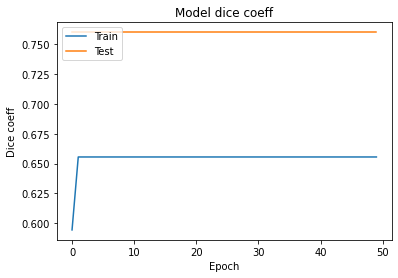

6/6 [==============================] - 0s 4ms/step - loss: -1.0000 - dice_coef: 1.0000
test loss, test acc: [-1.0, 1.0]


In [73]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
from skimage.segmentation import mark_boundaries
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from skimage.exposure import rescale_intensity
from keras.callbacks import History
from skimage import io
from OPoad import load_train_data, load_test_data
import nibabel as nib 
# powers of 2 are preferred in rows and cols so in down convolution we can split 
#the image dimensions by 2 several times without getting fractions
image_rows=128
image_cols=128
smooth = 1.

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def get_unet():
    #down-convolution
    inputs = Input((image_rows, image_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
   
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    
    #up-convolution:
    
    up6 = concatenate([Conv2DTranspose(250, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-3), loss=dice_coef_loss, metrics=[dice_coef])

    return model

#The different layers in our neural network model (including convolutions, maxpooling and upsampling)

def preprocess(imgs):
  #We adapt here our dataset samples dimension to 128x128 so that we can feed it to our network
    imgs_p = np.ndarray((imgs.shape[0], image_rows, image_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (image_rows, image_cols), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p

import matplotlib.pyplot as plt

def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    
    imgs_train, imgs_mask_train = load_train_data()

    #imgs_train = preprocess(imgs_train)
    #imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std
    #Normalization of the train set

    imgs_mask_train = imgs_mask_train.astype('float32')

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
    #Saving the weights and the loss of the best predictions we obtained

    print('-'*30)
    print('Fitting model...')
    print('-'*30)

    history=model.fit(imgs_train, imgs_mask_train, batch_size=1, epochs=50, verbose=1, shuffle=True,
              validation_split=0.5,callbacks=[model_checkpoint])

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)

    imgs_test, imgs_maskt = load_test_data()
    
    imgs_test = preprocess(imgs_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std
    #Normalization of the test set

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    
    pred_mask_test = model.predict(imgs_test, verbose=1)

    np.save('pred_mask_test.npy', pred_mask_test)

    print(type(pred_mask_test))

    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = '/content/drive/MyDrive/train'

    #for k in range(len(pred_mask_test)):
    #  a = rescale_intensity(imgs_test[k][:,:,0],out_range=(-1,1))
    #  b = (pred_mask_test[k][:,:,0]).astype('uint8')
    #  io.imsave(os.path.join(pred_dir, str(k) + '_pred.png'),mark_boundaries(a,b))

    #Saving our predictions in the directory 'preds'
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('Model dice coeff')
    plt.ylabel('Dice coeff')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    #plotting our dice coeff results in function of the number of epochs

 
    results=model.evaluate(imgs_test,pred_mask_test,1)
    print("test loss, test acc:", results)
 
if __name__ == '__main__':
    train_and_predict()
